# Bank Loan 
## Data Pre-Processing- Experimentation

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats

import os
print(os.getcwd())

c:\Users\haris\Desktop\GitHub_Projects\Statistics


## DataSource
https://www.kaggle.com/wordsforthewise/lending-club

In [26]:
Accepted_loan_df = pd.read_csv("RawData/accepted_2007_to_2018Q4.csv")
Rejected_loan_df = pd.read_csv("RawData/rejected_2007_to_2018Q4.csv")

In [37]:
intrestedAttributes = ['id', 'loan_amnt', 'int_rate', 'installment', 'grade', 'emp_title' , 'home_ownership', 'annual_inc', 'loan_status', 'purpose', 
                        'title','dti','delinq_2yrs','fico_range_low','fico_range_high','inq_last_6mths','mths_since_last_delinq','revol_bal','out_prncp','last_fico_range_high',
                        'last_fico_range_low', 'application_type', 'annual_inc_joint', 'dti_joint'] 

loan_df = Accepted_loan_df[intrestedAttributes]

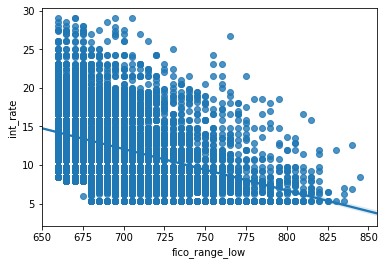

In [43]:
sns.regplot(x = 'fico_range_low', y='int_rate', data=loan_df[:10000])

In [44]:
loan_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [46]:
loan_int_df=loan_df[loan_df['loan_status'] != "Current"]
loan_int_df=loan_int_df[loan_df['loan_status'] != 'Late (31-120 days)']
loan_int_df=loan_int_df[loan_df['loan_status'] != 'In Grace Period']
loan_int_df=loan_int_df[loan_df['loan_status'] != 'Late (16-30 days)']

In [49]:
loan_int_df['loan_status'].value_counts()

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [50]:
loan_int_df.groupby('loan_status').agg({'last_fico_range_high': 'mean'})

,last_fico_range_high
loan_status,
Charged Off,568.443236
Default,588.875000
Does not meet the credit policy. Status:Charged Off,613.237845
Does not meet the credit policy. Status:Fully Paid,677.829477
Fully Paid,704.433473


In [51]:
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Charged Off', 'Default')
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Fully Paid', 'Good')

In [52]:
loan_int_df['loan_status'].value_counts()

Good                                                   1076751
Default                                                 268599
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Name: loan_status, dtype: int64

In [53]:
loan_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348132 entries, 0 to 2260700
Data columns (total 24 columns):
id                        1348132 non-null object
loan_amnt                 1348099 non-null float64
int_rate                  1348099 non-null float64
installment               1348099 non-null float64
grade                     1348099 non-null object
emp_title                 1262149 non-null object
home_ownership            1348099 non-null object
annual_inc                1348095 non-null float64
loan_status               1348099 non-null object
purpose                   1348099 non-null object
title                     1331438 non-null object
dti                       1347725 non-null float64
delinq_2yrs               1348070 non-null float64
fico_range_low            1348099 non-null float64
fico_range_high           1348099 non-null float64
inq_last_6mths            1348069 non-null float64
mths_since_last_delinq    668139 non-null float64
revol_bal                 13

In [62]:
print("fico_range_low_min :", loan_int_df['fico_range_low'].min())
print("fico_range_low_max :", loan_int_df['fico_range_low'].max())
print("last_fico_range_low_min :", loan_int_df['last_fico_range_low'].min())
print("last_fico_range_low_min :", loan_int_df['last_fico_range_low'].min())
print("last_fico_range_low_max :", loan_int_df['last_fico_range_low'].max())

fico_range_low_min : 610.0
fico_range_low_max : 845.0
last_fico_range_low_min : 0.0
last_fico_range_low_min : 0.0
last_fico_range_low_max : 845.0


In [63]:
loan_int_df['last_fico_range_low']=loan_int_df.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0.0 else x['last_fico_range_low'],axis=1)

In [66]:
import math
loan_int_df = loan_int_df.dropna(subset=['last_fico_range_low'])
loan_int_df['fico_score'] = loan_int_df['last_fico_range_low'].apply(lambda x: int(math.ceil(x/10))*10)

In [67]:
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,...,1.0,30.0,2765.0,0.0,564.0,560.0,Individual,NaN,NaN,560
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,...,4.0,6.0,21470.0,0.0,699.0,695.0,Individual,NaN,NaN,700
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,...,0.0,NaN,7869.0,0.0,704.0,700.0,Joint App,71000.0,13.85,700
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,...,3.0,12.0,21929.0,0.0,704.0,700.0,Individual,NaN,NaN,700
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,...,0.0,NaN,8822.0,0.0,759.0,755.0,Individual,NaN,NaN,760


In [68]:
loan_int_df.isnull().sum()

id                              0
loan_amnt                       0
int_rate                        0
installment                     0
grade                           0
emp_title                   85950
home_ownership                  0
annual_inc                      4
loan_status                     0
purpose                         0
title                       16661
dti                           374
delinq_2yrs                    29
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                 30
mths_since_last_delinq     679960
revol_bal                       0
out_prncp                       0
last_fico_range_high            0
last_fico_range_low             0
application_type                0
annual_inc_joint          1322293
dti_joint                 1322296
fico_score                      0
dtype: int64

In [69]:
loan_int_df[loan_df['dti'].isnull()]

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
18202,66415476,20000.0,16.99,712.96,D,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,1.0,NaN,7161.0,0.0,649.0,645.0,Joint App,185000.0,5.31,650
65620,65199509,3700.0,12.59,123.94,C,NaN,MORTGAGE,0.0,Default,credit_card,...,1.0,10.0,10649.0,0.0,539.0,535.0,Joint App,40988.0,28.72,540
422321,130138254,40000.0,15.04,1387.40,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,6.0,5646.0,0.0,584.0,580.0,Joint App,200000.0,22.90,580
422892,130712137,21000.0,11.98,697.30,B,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,0.0,NaN,11846.0,0.0,704.0,700.0,Joint App,70000.0,8.45,700
424935,129700950,16800.0,7.34,335.37,A,NaN,MORTGAGE,0.0,Good,home_improvement,...,0.0,NaN,288.0,0.0,759.0,755.0,Joint App,130000.0,8.90,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222132,92004398,16000.0,21.49,437.28,D,NaN,MORTGAGE,0.0,Good,credit_card,...,0.0,46.0,11735.0,0.0,719.0,715.0,Joint App,125000.0,24.88,720
2228436,91834232,8750.0,15.99,307.59,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,NaN,14111.0,0.0,549.0,545.0,Joint App,25000.0,24.30,550
2228456,91685988,18000.0,17.99,456.99,D,Independent Consultant,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,58.0,2601.0,0.0,509.0,505.0,Joint App,55000.0,25.13,510
2231449,91843866,15000.0,11.39,493.86,B,NaN,MORTGAGE,1.0,Good,debt_consolidation,...,1.0,11.0,3470.0,0.0,499.0,680.0,Joint App,150001.0,13.35,680


In [74]:
loan_int_df['dti_final'] = loan_int_df.apply(lambda x: x['dti_joint'] if pd.isnull(x['dti']) else x['dti'], axis=1)
loan_int_df['annual_inc_final'] = loan_int_df.apply(lambda x: x['annual_inc_joint'] if x['annual_inc'] == 0.0 else x['annual_inc'], axis=1)

In [75]:
loan_int_df.isnull().sum()

id                              0
loan_amnt                       0
int_rate                        0
installment                     0
grade                           0
emp_title                   85950
home_ownership                  0
annual_inc                      4
loan_status                     0
purpose                         0
title                       16661
dti                           374
delinq_2yrs                    29
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                 30
mths_since_last_delinq     679960
revol_bal                       0
out_prncp                       0
last_fico_range_high            0
last_fico_range_low             0
application_type                0
annual_inc_joint          1322293
dti_joint                 1322296
fico_score                      0
dti_final                       0
annual_inc_final                4
dtype: int64

In [76]:
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score,dti_final,annual_inc_final
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,...,2765.0,0.0,564.0,560.0,Individual,NaN,NaN,560,5.91,55000.0
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,...,21470.0,0.0,699.0,695.0,Individual,NaN,NaN,700,16.06,65000.0
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,...,7869.0,0.0,704.0,700.0,Joint App,71000.0,13.85,700,10.78,63000.0
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,...,21929.0,0.0,704.0,700.0,Individual,NaN,NaN,700,25.37,104433.0
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,...,8822.0,0.0,759.0,755.0,Individual,NaN,NaN,760,10.20,34000.0


In [77]:
fico_df=loan_int_df['fico_score'].value_counts().sort_index()
fico_df.head()

500     7663
510    17659
520    20337
530    22525
540    25705
Name: fico_score, dtype: int64

In [92]:
loan_int_df[loan_int_df['loan_status'] == 'Default']['fico_score'].value_counts().sort_index().head()

500     6473
510    14603
520    16468
530    17827
540    19576
Name: fico_score, dtype: int64

In [91]:
loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean', 'loan_amnt':'mean','annual_inc':'median'}).head()

,dti_final,loan_amnt,annual_inc
fico_score,,,
500,18.585422,13636.297795,56000.0
510,19.062190,13797.041169,56160.0
520,19.329466,14025.865418,58000.0
530,19.497190,14397.295228,60000.0
540,19.977028,14576.474421,60000.0


In [90]:
loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean().head()

,annual_inc,int_rate
fico_score,,
500,64848.026484,15.739192
510,65413.404373,15.768737
520,68056.159686,15.571856
530,68586.213829,15.717382
540,69625.667946,15.570908


In [103]:
fico_df=pd.concat([ fico_df,
                    pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()),
                    pd.DataFrame(loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean', 'loan_amnt':'mean','annual_inc':'median'})),
                    pd.DataFrame(loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean())],
                    ignore_index=True, axis=1)[[0,1,2,3,4,5,6]]

fico_df.head()

,0,1,2,3,4,5,6
0,0.0,500.0,18.585422,6473.0,18.585422,13636.297795,56000.0
1,1.0,510.0,19.062190,14603.0,19.062190,13797.041169,56160.0
2,2.0,520.0,19.329466,16468.0,19.329466,14025.865418,58000.0
3,3.0,530.0,19.497190,17827.0,19.497190,14397.295228,60000.0
4,4.0,540.0,19.977028,19576.0,19.977028,14576.474421,60000.0


In [104]:
fico_df=fico_df.reset_index()
fico_df.columns = ['fico_score','loan_total','default_total','dti','avg_loan_amnt','median_annual_inc','avg_annual_inc','int_rate']
fico_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate
0,0,0.0,500.0,18.585422,6473.0,18.585422,13636.297795,56000.0
1,1,1.0,510.0,19.062190,14603.0,19.062190,13797.041169,56160.0
2,2,2.0,520.0,19.329466,16468.0,19.329466,14025.865418,58000.0
3,3,3.0,530.0,19.497190,17827.0,19.497190,14397.295228,60000.0
4,4,4.0,540.0,19.977028,19576.0,19.977028,14576.474421,60000.0


In [105]:
fico_df['default_rate']=(fico_df.default_total/fico_df.default_total.sum())*100
fico_df['actual_default_rate']=(fico_df.default_total/fico_df.loan_total.sum())*100
fico_df.head(10)

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,0,0.0,500.0,18.585422,6473.0,18.585422,13636.297795,56000.0,2.057613,79.365079
1,1,1.0,510.0,19.062190,14603.0,19.062190,13797.041169,56160.0,2.098765,80.952381
2,2,2.0,520.0,19.329466,16468.0,19.329466,14025.865418,58000.0,2.139918,82.539683
3,3,3.0,530.0,19.497190,17827.0,19.497190,14397.295228,60000.0,2.181070,84.126984
4,4,4.0,540.0,19.977028,19576.0,19.977028,14576.474421,60000.0,2.222222,85.714286
5,5,5.0,550.0,19.970402,19682.0,19.970402,14730.694966,60000.0,2.263374,87.301587
6,6,6.0,560.0,20.042466,18985.0,20.042466,14783.067917,60233.0,2.304527,88.888889
7,7,7.0,570.0,19.972105,17915.0,19.972105,14789.444002,61000.0,2.345679,90.476190
8,8,8.0,580.0,19.881493,16402.0,19.881493,14735.069892,61000.0,2.386831,92.063492
9,9,9.0,590.0,19.640231,14626.0,19.640231,14564.107561,60000.0,2.427984,93.650794


In [106]:
fico_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,72.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,346.250000,17.500000,675.000000,18.080006,7461.083333,18.080006,14851.758781,64955.777778,2.777778,107.142857
std,339.301219,10.535654,105.356538,1.569440,6973.150136,1.569440,1434.244858,6347.463935,0.433566,16.723260
min,0.000000,0.000000,500.000000,14.082353,8.000000,14.082353,13017.910027,56000.000000,2.057613,79.365079
25%,17.750000,8.750000,587.500000,17.047282,462.500000,17.047282,13942.941197,60000.000000,2.417695,93.253968
50%,267.500000,17.500000,675.000000,18.414612,6292.000000,18.414612,14676.012122,63000.000000,2.777778,107.142857
75%,672.500000,26.250000,762.500000,19.339676,13331.000000,19.339676,15067.490863,68000.000000,3.137860,121.031746
max,850.000000,35.000000,850.000000,20.042466,19682.000000,20.042466,19499.313725,80000.000000,3.497942,134.920635


In [107]:
fico_df.to_csv('RawData/Accepted_Loan_Summary.csv')

In [108]:
fico_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,1.000000,1.000000,-0.913191,-0.899658,-0.913191,0.681957,0.926061,1.000000,1.000000
loan_total,1.000000,1.000000,1.000000,-0.913191,-0.899658,-0.913191,0.681957,0.926061,1.000000,1.000000
default_total,1.000000,1.000000,1.000000,-0.913191,-0.899658,-0.913191,0.681957,0.926061,1.000000,1.000000
dti,-0.913191,-0.913191,-0.913191,1.000000,0.861006,1.000000,-0.798366,-0.918144,-0.913191,-0.913191
avg_loan_amnt,-0.899658,-0.899658,-0.899658,0.861006,1.000000,0.861006,-0.485084,-0.775884,-0.899658,-0.899658
median_annual_inc,-0.913191,-0.913191,-0.913191,1.000000,0.861006,1.000000,-0.798366,-0.918144,-0.913191,-0.913191
avg_annual_inc,0.681957,0.681957,0.681957,-0.798366,-0.485084,-0.798366,1.000000,0.855543,0.681957,0.681957
int_rate,0.926061,0.926061,0.926061,-0.918144,-0.775884,-0.918144,0.855543,1.000000,0.926061,0.926061
default_rate,1.000000,1.000000,1.000000,-0.913191,-0.899658,-0.913191,0.681957,0.926061,1.000000,1.000000
actual_default_rate,1.000000,1.000000,1.000000,-0.913191,-0.899658,-0.913191,0.681957,0.926061,1.000000,1.000000
